In [1]:
#VERSION CHECKING
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.15.0


# MNIST FASHION

In [2]:
fashion_mnist = keras.datasets.fashion_mnist #tf.keras.datasets

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

Labels.   Classes
0.   T-shirt/top
1. 	Trouser
2. 	Pullover
3. 	Dress
4. 	Coat
5. 	Sandal
6. 	Shirt
7. 	Sneaker
8. 	Bag
9. 	Ankle boot



Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images.shape


(60000, 28, 28)

In [5]:
len(train_labels)


60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
print(test_images.shape)
print(len(test_labels))


(10000, 28, 28)
10000


# VISUALISATION

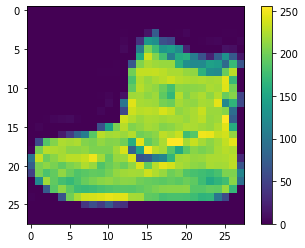

Ankle boot


In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()
print(class_names[train_labels[0]])

# NORMALISATION and Preprocessing

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0



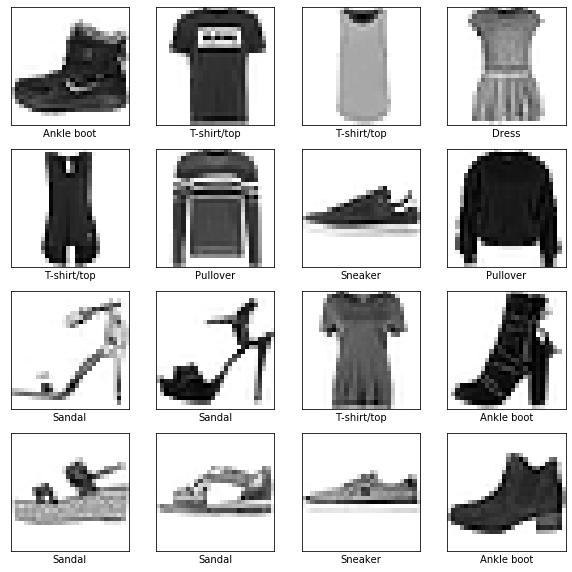

In [10]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # SINGLE DENSE LAYER
    keras.layers.Dense(10, activation='softmax')
])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.fit(train_images, train_labels, epochs=15)


Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3511 - acc: 0.8718
Epoch 2/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3250 - acc: 0.8822
Epoch 3/15
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3028 - acc: 0.8877
Epoch 4/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2858 - acc: 0.8955
Epoch 5/15
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2733 - acc: 0.8995
Epoch 6/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2611 - acc: 0.9028
Epoch 7/15
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2524 - acc: 0.9055
Epoch 8/15
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2412 - acc: 0.9100
Epoch 9/15
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2350 - acc: 0.9121
Epoch 10/15
60000/60000 [==============================] - 

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 0s - loss: 0.3378 - acc: 0.8892

Test accuracy: 0.8892


In [0]:
predictions = model.predict(test_images)


In [17]:
predictions[0]


array([2.5402929e-07, 1.9157907e-12, 5.6326509e-11, 1.0025425e-13,
       1.5634668e-13, 1.2365903e-03, 3.3846368e-09, 4.4712382e-03,
       1.5786384e-09, 9.9429190e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])


9

In [19]:
test_labels[0]


9

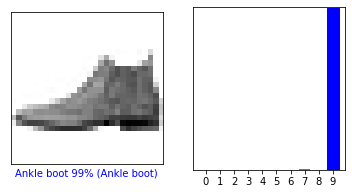

In [20]:
# REFERED FROM TF2.0 DOCUMENTATION
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


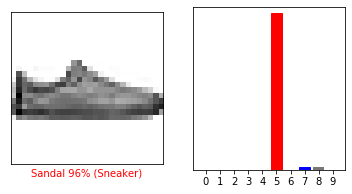

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


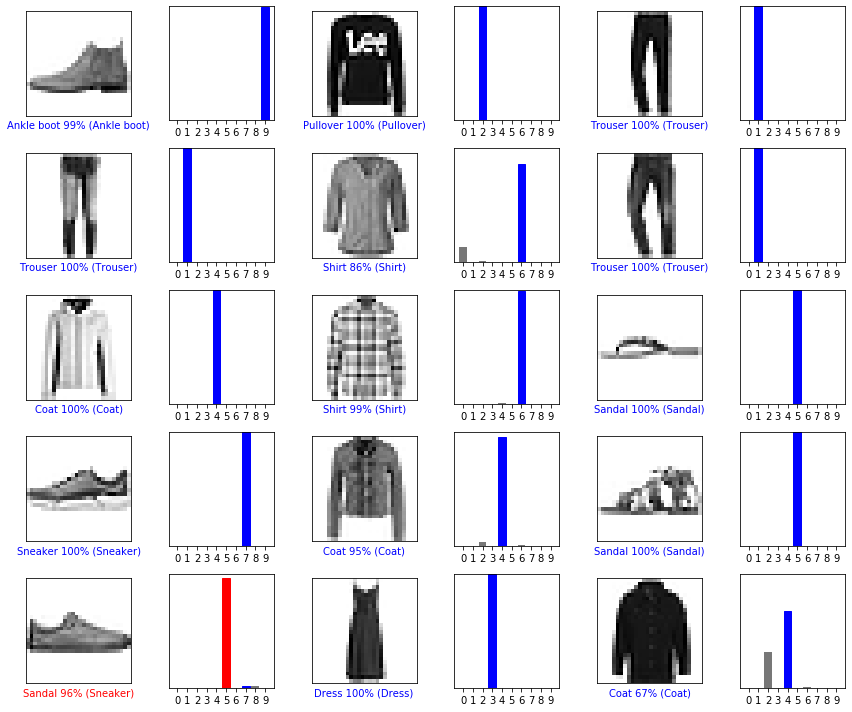

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# MNIST DATASET

In [23]:
mnist = keras.datasets.mnist #tf.keras.datasets

(train_images1, train_labels1), (test_images1, test_labels1) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [24]:
print(train_images1.shape)
print(train_labels1.shape)
print(test_images1.shape)
print(test_labels1.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


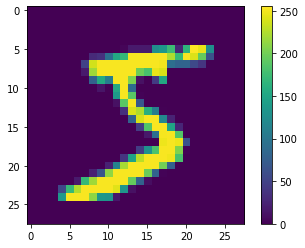

[5]


In [25]:
plt.figure()
plt.imshow(train_images1[0])
plt.colorbar()
plt.grid(False)
plt.show()
print([train_labels1[0]])

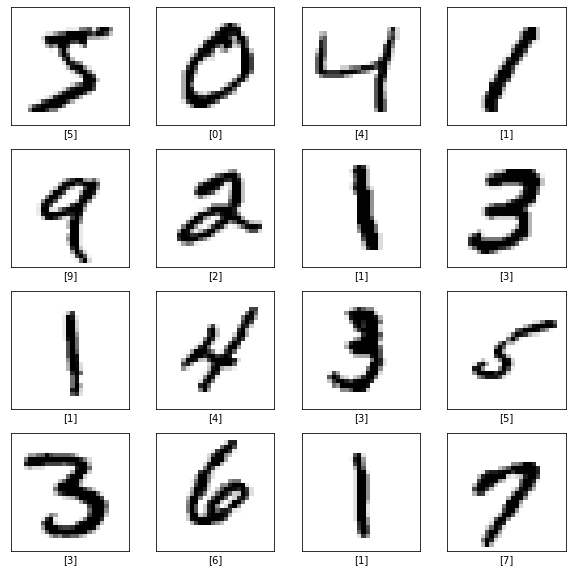

In [27]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images1[i], cmap=plt.cm.binary)
    plt.xlabel([train_labels1[i]])
plt.show()

In [0]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # DUAL DENSE LAYER
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [36]:
model1.fit(train_images1, train_labels1, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 76us/sample - loss: 1.7407 - acc: 0.8683
Epoch 2/15
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3018 - acc: 0.9275
Epoch 3/15
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2246 - acc: 0.9415
Epoch 4/15
60000/60000 [==============================] - 4s 75us/sample - loss: 0.1789 - acc: 0.9521
Epoch 5/15
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1553 - acc: 0.9574
Epoch 6/15
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1249 - acc: 0.9651
Epoch 7/15
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1121 - acc: 0.9677
Epoch 8/15
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0999 - acc: 0.9708
Epoch 9/15
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0926 - acc: 0.9738
Epoch 10/15
60000/60000 [==============================] - 

In [37]:
test_loss, test_acc = model1.evaluate(test_images1,  test_labels1, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.1534 - acc: 0.9691

Test accuracy: 0.9691


In [0]:
predictions1 = model1.predict(test_images1)

In [39]:
predictions1[0]

array([1.04404255e-19, 1.47084917e-14, 1.28912490e-07, 8.02043111e-13,
       4.08865108e-10, 1.80398265e-14, 1.38722644e-27, 9.99999881e-01,
       2.49212446e-15, 3.57040157e-08], dtype=float32)

In [42]:
np.argmax(predictions1[0])

7

In [43]:
test_labels1[0]

7

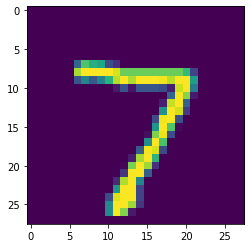

In [44]:
plt.imshow(test_images1[0])